# Programming Assignment 2

Topics covered in this assigment:


*   Decision Tree
  * https://youtu.be/_L39rN6gz7Y
  * https://scikit-learn.org/stable/modules/tree.html
*   Bayesian Methods
  * https://youtu.be/O2L2Uv9pdDA
  *https://scikit-learn.org/stable/modules/naive_bayes.html
*   Support Vector Machine
 * https://youtu.be/efR1C6CvhmE
 * https://youtu.be/VngCRWPrNNc
 * https://scikit-learn.org/stable/modules/svm.html

Dataset used:
UCI ML Breast Cancer Wisconsin (Diagnostic) dataset

Explore the dataset to find the number of features and labels and the size of the dataset.

Split the dataset into train and test set and use the parameter $\texttt{stratify=dataset.target}$




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import cvxpy as cp

from sklearn.datasets import load_breast_cancer

#load data
dataset = load_breast_cancer()

#explore dataset
num_features = dataset.data.shape[1]  # Number of features
num_samples = dataset.data.shape[0]   # Total number of samples
unique_labels = set(dataset.target)   # Unique labels/classes
num_labels = len(unique_labels)       # Number of unique labels/classes

print(f"Number of features: {num_features}")
print(f"Number of samples: {num_samples}")
print(f"Number of labels: {num_labels}")

from sklearn.model_selection import train_test_split
#split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    dataset.data, 
    dataset.target, 
    test_size=0.2, 
    stratify=dataset.target, 
    random_state=42
)

# Print the sizes of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Number of features: 30
Number of samples: 569
Number of labels: 2
Training set size: 455 samples
Testing set size: 114 samples


## Decision Tree (30 points)



### Training decision tree (5 points)

Use [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)


1.  Define this model and fit it over your training set.
2. Measure accuracy, precision, recall and F1 score of the trained model over test dataset.
  * For averaging use $\texttt{macro}$ aggregation.





In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

#initialize model
model = DecisionTreeClassifier(random_state=42)

#fit model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Print measure metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}
print(f"metrics:{metrics}")

metrics:{'Accuracy': 0.9122807017543859, 'Precision': 0.9018542199488491, 'Recall': 0.9156746031746033, 'F1 Score': 0.9074675324675325}


In [3]:
#print accuracy/score of train and test data for comparison
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"train accuracy:{train_accuracy}")
print(f"test_accuracy:{test_accuracy}")

train accuracy:1.0
test_accuracy:0.9122807017543859


### Plot decision tree (5 points)

Use [sklearn.tree.plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) to plot the trained model

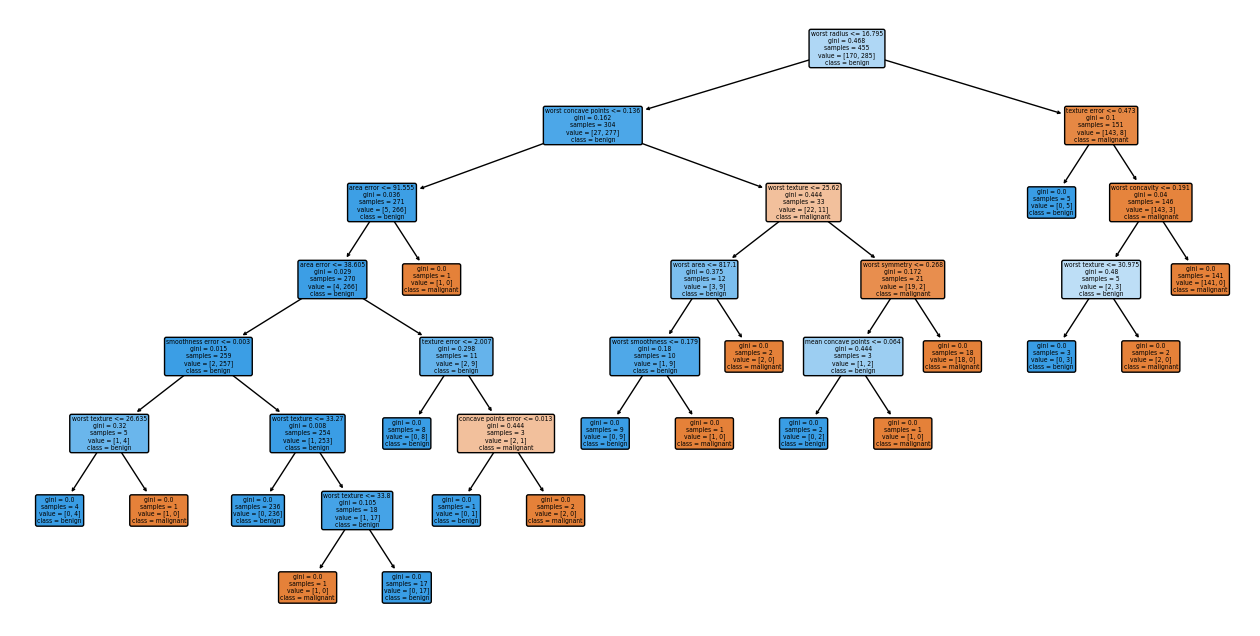

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert feature_names from numpy array to list for compatibility
feature_names_list = dataset.feature_names.tolist()
class_names_list = dataset.target_names.tolist()

# Plot the decision tree again with feature_names as a list
plt.figure(figsize=(16,8))  
plot_tree(model, filled=True, feature_names=feature_names_list, class_names=class_names_list, rounded=True)
plt.show()

### search for parameters to reduce overfitting on decision tree (10 points)

* Fit [sklearn.model_selection.GridSearchCV ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to search for the parameters.

* Define a dictionary called parameters with keys : max_depth and min_samples_leaf such that
  max_depth = [1, 2, 3, 4, 5]  
  min_samples_leaf = [5, 10, 15, 20]

* Train the GridSearchCV model with input parameters = (defined_decision_tree, parameters, n_jobs=1)

* Measure accuracy, precision, recall and F1 score of the trained model over test dataset and use $\texttt{macro}$ aggregation for averaging.

* Print train and test accuracy of the GridSearchCV model

In [5]:
from sklearn.model_selection import GridSearchCV
# Define the Decision Tree Classifier and the parameter grid
defined_decision_tree = DecisionTreeClassifier(random_state=42)
parameters = {
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [5, 10, 15, 20]
}
grid_search = GridSearchCV(defined_decision_tree, parameters, n_jobs=1, scoring='accuracy', cv=5)
#initialize model

#fit model
grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_

#predict labels and print measure metrics - accuracy, precision, recall, F1
y_pred_grid = grid_search.predict(X_test)

#print accuracy/score of train and test data for comparison
accuracy_grid = accuracy_score(y_test, y_pred_grid)
precision_grid, recall_grid, f1_grid, _ = precision_recall_fscore_support(y_test, y_pred_grid, average='macro')
# Measure metrics
metrics_grid = {
    "Accuracy": accuracy_grid,
    "Precision": precision_grid,
    "Recall": recall_grid,
    "F1 Score": f1_grid
}

# Train and test accuracy of the GridSearchCV model
train_accuracy_grid = grid_search.score(X_train, y_train)
test_accuracy_grid = grid_search.score(X_test, y_test)

print(f"best_parameters:{best_parameters}")
print(f"metrics_grid:{metrics_grid}") 
print(f"train_accuracy_grid:{train_accuracy_grid}") 
print(f"test_accuracy_grid:{test_accuracy_grid}")

best_parameters:{'max_depth': 5, 'min_samples_leaf': 5}
metrics_grid:{'Accuracy': 0.9210526315789473, 'Precision': 0.913691451031772, 'Recall': 0.9176587301587302, 'F1 Score': 0.9155902920608804}
train_accuracy_grid:0.9758241758241758
test_accuracy_grid:0.9210526315789473


### Ploting accuracy over parameters (10 points)

* Plot test and train accuracy of sklearn.tree.DecisionTreeClassifier per max_depth

* Plot test and train accuarcy of accuracy of sklearn.tree.DecisionTreeClassifier per min_samples_leaf

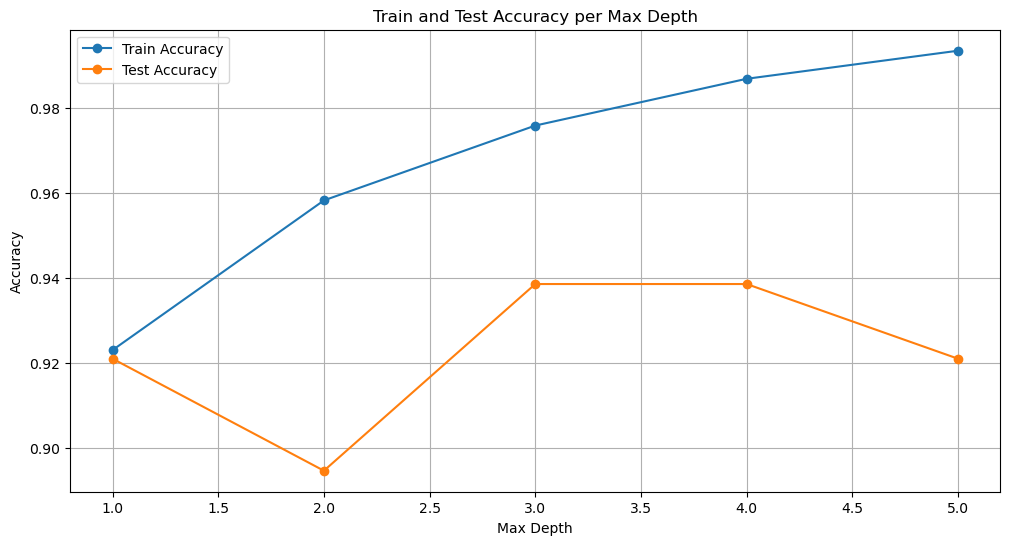

In [6]:
#plot accuracy/score of train and test data per max_depth
max_depth_values = [1, 2, 3, 4, 5]
min_samples_leaf_values = [5, 10, 15, 20]

# Train and test accuracy per max_depth
train_accuracy_max_depth = []
test_accuracy_max_depth = []

for depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_accuracy_max_depth.append(model.score(X_train, y_train))
    test_accuracy_max_depth.append(model.score(X_test, y_test))

# Plotting train and test accuracy per max_depth
plt.figure(figsize=(12, 6))
plt.plot(max_depth_values, train_accuracy_max_depth, label='Train Accuracy', marker='o')
plt.plot(max_depth_values, test_accuracy_max_depth, label='Test Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy per Max Depth')
plt.legend()
plt.grid(True)
plt.show()

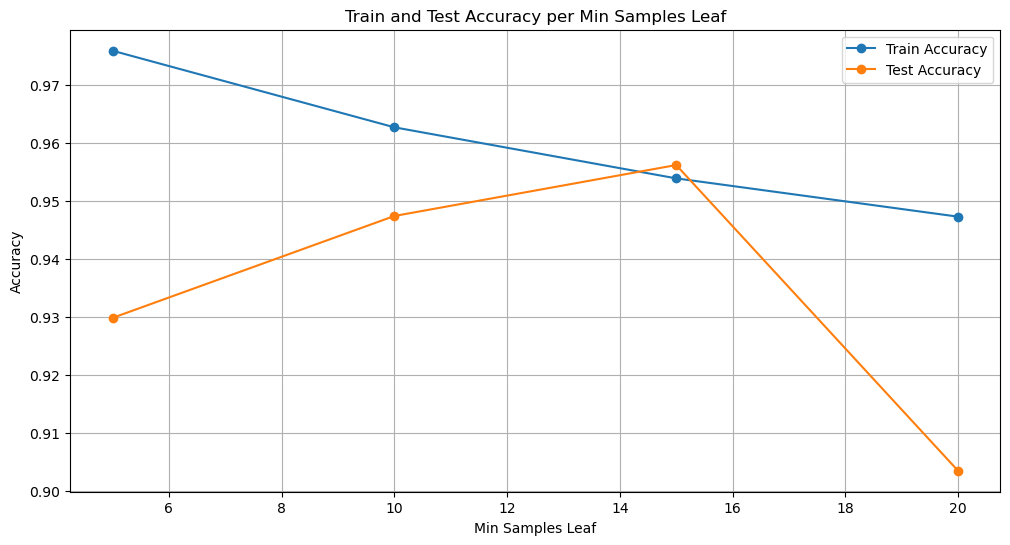

In [7]:
#plot accuracy/score of train and test data per min_samples_leaf

train_accuracy_min_samples_leaf = []
test_accuracy_min_samples_leaf = []

# Iterate over min_samples_leaf values, train models, and store accuracies
for leaf in min_samples_leaf_values:
    model = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train, y_train)
    train_accuracy_min_samples_leaf.append(model.score(X_train, y_train))
    test_accuracy_min_samples_leaf.append(model.score(X_test, y_test))

# Plotting train and test accuracy per min_samples_leaf
plt.figure(figsize=(12, 6))
plt.plot(min_samples_leaf_values, train_accuracy_min_samples_leaf, label='Train Accuracy', marker='o')
plt.plot(min_samples_leaf_values, test_accuracy_min_samples_leaf, label='Test Accuracy', marker='o')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy per Min Samples Leaf')
plt.legend()
plt.grid(True)
plt.show()

## Bayesian Methods (20 points)

Naive Baye's model assumes the probability distribution of the data before training.

 We will fit and compare Bayesian models with different probability distributions.

 We will use [sklearn.naive_bayes.GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) , [sklearn.naive_bayes.MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) , and [sklearn.naive_bayes.BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) models and fit it over our training data.

 Measure accuracy, precision, recall and F1 score of the trained model over test dataset and use $\texttt{macro}$ aggregation for averaging.

 Measure train and test accuracy for comparison.

### Gaussian Naive Bayes (5 points)

In [8]:
from sklearn.naive_bayes import GaussianNB

#initialize model
gaussian_nb = GaussianNB()
#fit model
gaussian_nb.fit(X_train, y_train)
#predict labels and print measure metrics - accuracy, precision, recall, F1
y_pred_gaussian = gaussian_nb.predict(X_test)
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
precision_gaussian, recall_gaussian, f1_gaussian, _ = precision_recall_fscore_support(y_test, y_pred_gaussian, average='macro')
# Measure metrics for Gaussian Naive Bayes
metrics_gaussian = {
    "Accuracy": accuracy_gaussian,
    "Precision": precision_gaussian,
    "Recall": recall_gaussian,
    "F1 Score": f1_gaussian
}
#print accuracy/score of train and test data for comparison
train_accuracy_gaussian = gaussian_nb.score(X_train, y_train)
test_accuracy_gaussian = gaussian_nb.score(X_test, y_test)

print(f"metrics_gaussian:{metrics_gaussian}") 
print(f"train_accuracy_gaussian:{train_accuracy_gaussian}") 
print(f"test_accuracy_gaussian:{test_accuracy_gaussian}")

metrics_gaussian:{'Accuracy': 0.9385964912280702, 'Precision': 0.9360173738723689, 'Recall': 0.9315476190476191, 'F1 Score': 0.933693394266722}
train_accuracy_gaussian:0.9406593406593406
test_accuracy_gaussian:0.9385964912280702


# Multinomial Naive Bayes (5 points)

In [9]:
from sklearn.naive_bayes import MultinomialNB

#initialize model
multinomial_nb = MultinomialNB()
#fit model
multinomial_nb.fit(X_train, y_train)
#predict labels and print measure metrics - accuracy, precision, recall, F1
y_pred_multinomial = multinomial_nb.predict(X_test)
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
precision_multinomial, recall_multinomial, f1_multinomial, _ = precision_recall_fscore_support(y_test, y_pred_multinomial, average='macro')
# Measure metrics for Multinomial Naive Bayes
metrics_multinomial = {
    "Accuracy": accuracy_multinomial,
    "Precision": precision_multinomial,
    "Recall": recall_multinomial,
    "F1 Score": f1_multinomial
}
#print accuracy/score of train and test data for comparison
train_accuracy_multinomial = multinomial_nb.score(X_train, y_train)
test_accuracy_multinomial = multinomial_nb.score(X_test, y_test)

print(f"metrics_multinomial:{metrics_multinomial}") 
print(f"train_accuracy_multinomial:{train_accuracy_multinomial}") 
print(f"test_accuracy_multinomial:{test_accuracy_multinomial}")

metrics_multinomial:{'Accuracy': 0.9298245614035088, 'Precision': 0.9342105263157894, 'Recall': 0.9146825396825397, 'F1 Score': 0.922972972972973}
train_accuracy_multinomial:0.8857142857142857
test_accuracy_multinomial:0.9298245614035088


### Bernoulli Naive Bayes (5 points)

In [10]:
from sklearn.naive_bayes import BernoulliNB

#initialize model
bernoulli_nb = BernoulliNB()
#fit model
bernoulli_nb.fit(X_train, y_train)
#predict labels and print measure metrics - accuracy, precision, recall, F1
y_pred_bernoulli = bernoulli_nb.predict(X_test)
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
precision_bernoulli, recall_bernoulli, f1_bernoulli, _ = precision_recall_fscore_support(y_test, y_pred_bernoulli, average='macro')

# Measure metrics for Bernoulli Naive Bayes
metrics_bernoulli = {
    "Accuracy": accuracy_bernoulli,
    "Precision": precision_bernoulli,
    "Recall": recall_bernoulli,
    "F1 Score": f1_bernoulli
}

#print accuracy/score of train and test data for comparison
train_accuracy_bernoulli = bernoulli_nb.score(X_train, y_train)
test_accuracy_bernoulli = bernoulli_nb.score(X_test, y_test)
print(f"metrics_bernoulli:{metrics_bernoulli}") 
print(f"train_accuracy_bernoulli:{train_accuracy_bernoulli}") 
print(f"test_accuracy_bernoulli:{test_accuracy_bernoulli}")

metrics_bernoulli:{'Accuracy': 0.631578947368421, 'Precision': 0.3157894736842105, 'Recall': 0.5, 'F1 Score': 0.3870967741935484}
train_accuracy_bernoulli:0.6263736263736264
test_accuracy_bernoulli:0.631578947368421


C:\Users\hemus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Bar plots of accuracy and F1 scores(5 points)

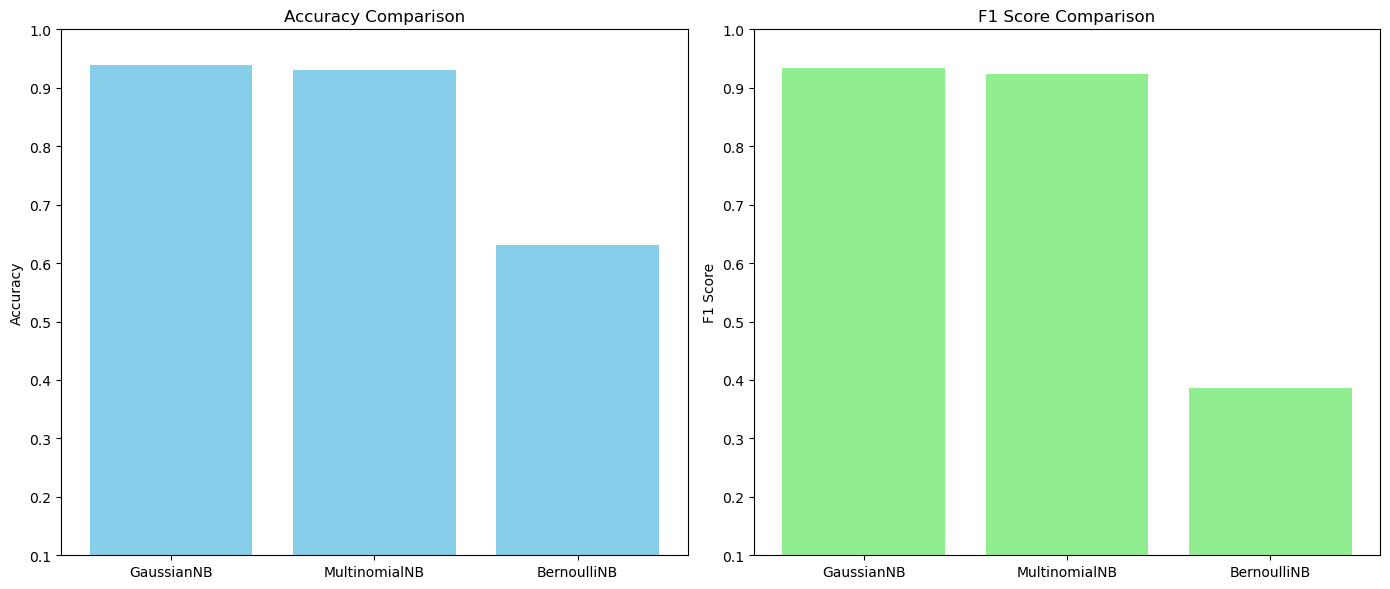

In [11]:
#Plot bar plots of accuracy and F1 scores of these models with x-axis labelled with models (GaussianNB, MultinomialNB, BernoulliNB)
model_names = ['GaussianNB', 'MultinomialNB', 'BernoulliNB']
accuracies = [accuracy_gaussian, accuracy_multinomial, accuracy_bernoulli]
f1_scores = [f1_gaussian, f1_multinomial, f1_bernoulli]

# Plotting the accuracies and F1 scores
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy plot
ax[0].bar(model_names, accuracies, color='skyblue')
ax[0].set_title('Accuracy Comparison')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.1, 1)

# F1 Score plot
ax[1].bar(model_names, f1_scores, color='lightgreen')
ax[1].set_title('F1 Score Comparison')
ax[1].set_ylabel('F1 Score')
ax[1].set_ylim(0.1, 1)

plt.tight_layout()
plt.show()

## SVM (40 points)

#SVM (40 points)
Write the SVM algorithm from scratch and use [CVXPY](https://www.cvxpy.org/index.html) to optimize it. Split the data into train and test dataset like above using sklearn. Use your X_train and y_train to optimize W and b. Use the calculated W and b to test X_test and y_test.


* Fit [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) over you X_train. Use that to transform you X_train and X_test.  

* Initialize your W matrix and b vector using CVXPY variable. 
  * The size of your W matrix should be equal to the number of features in your dataset.
  * Initialize B as a CVXPY variable without assigning a value.
  * Initialize λ as a non-negative CVXPY variable without assigning a value.



* Your objective is to minimize $$\frac{loss}{len(X\_train)}+ λ*reg$$ such that

* $$loss = \sum_{len(X\_train)}max((1 - y * (W^TX + b)))$$ 

* $$reg =  \frac{1}{2}||W||^2$$

<!-- * Your constraint is - $$y * (W^TX + b) - 1 \geq 0$$ -->

  * where $$y = y\_train$$  $$X = X\_train$$ 
  $$len(X\_train) = number\_of\_samples\_in\_X\_train$$

* Use the objective function to solve the problem 
 (optimize the W and b).

* Use the calculated W and b to predict y over X_test. 

* Measure accuracy, precision, recall and F1 score of the trained model over test dataset and use $\texttt{macro}$ aggregation for averaging.


In [12]:
import cvxpy as cp
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

#declare necessary variables
X_train, X_test, y_train, y_test = train_test_split(
    dataset.data, 
    dataset.target, 
    test_size=0.2, 
    stratify=dataset.target, 
    random_state=42
)

#turn y labels from (0/1) to (-1/1)
Y_train = y_train * 2 - 1
Y_test = y_test * 2 - 1

#turn y into 2D matrix : use the commented code with required changes
#Y = Y.reshape([-1, 1])
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

#StandardScaler fit and transform X_train and X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#constraints - initialize W, B, loss, reg, lambda
# lambda.value = 0.5
n_features = X_train_scaled.shape[1]
W = cp.Variable((n_features, 1))
b = cp.Variable()
lambda_ = cp.Parameter(nonneg=True)
lambda_.value = 0.5

#objective
loss = cp.sum(cp.pos(1 - cp.multiply(Y_train, X_train_scaled @ W + b)))
reg = cp.norm(W, 2)**2 / 2
objective = cp.Minimize((loss/len(X_train)) + lambda_ * reg)


#optimize
prob = cp.Problem(objective)
prob.solve()

C:\Users\hemus\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


0.210068972699327

Use the calculated W and b values to predict y values on X_test.

Measure accuracy, precision, recall and F1 score of the trained model over test dataset and use  macro  aggregation for averaging

In [13]:
#predict labels and print measure metrics - accuracy, precision, recall, F1
y_pred_test = X_test_scaled @ W.value + b.value
y_pred_test_labels = np.sign(y_pred_test).flatten()
y_pred_test_labels = (y_pred_test_labels + 1) // 2

accuracy = accuracy_score(y_test, y_pred_test_labels)
precision, recall, f1_score, _ = precision_recall_fscore_support(
    y_test, y_pred_test_labels, average='macro'
)

In [14]:
# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

# Print the optimal parameters
print('Learned weight vector W:', W.value.flatten())
print('Learned bias b:', b.value)

Accuracy: 0.956140350877193
Precision: 0.9605128205128205
Recall: 0.9454365079365079
F1 Score: 0.9521289997480473
Learned weight vector W: [-0.12125353 -0.11867855 -0.11914742 -0.11599659 -0.06236308 -0.03717052
 -0.09627535 -0.13582924 -0.06976326  0.04723326 -0.10366097  0.01271146
 -0.0803773  -0.0935982  -0.01378991  0.03972412  0.04108418 -0.02205654
  0.03059873  0.0496672  -0.15181418 -0.14752815 -0.14449485 -0.13809429
 -0.12500333 -0.0789442  -0.10105281 -0.15593581 -0.12722485 -0.06877476]
Learned bias b: 0.3070298797430375
